In [1]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('sales_data_sample.csv',encoding='Latin')

In [6]:
data.info

<bound method DataFrame.info of       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \


In [7]:
data.shape

(2823, 25)

In [8]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [9]:
features=['QUANTITYORDERED','PRICEEACH','MSRP','SALES']

In [10]:
X=data[features].dropna()

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()

In [14]:
X_scale=scaler.fit_transform(X)

In [17]:
from sklearn.cluster import KMeans

In [18]:
K_range=range(1,11)

In [19]:
WCSS=[]
for k in K_range:
    knn=KMeans(n_clusters=k,random_state=42)
    knn.fit(X_scale)
    WCSS.append(knn.inertia_)
    

C:\Users\Harshada\anaconda31\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Harshada\anaconda31\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Harshada\anaconda31\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Harshada\anaconda31\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Harshada\anaconda31\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid

AttributeError: module 'matplotlib.pyplot' has no attribute 'xsticks'

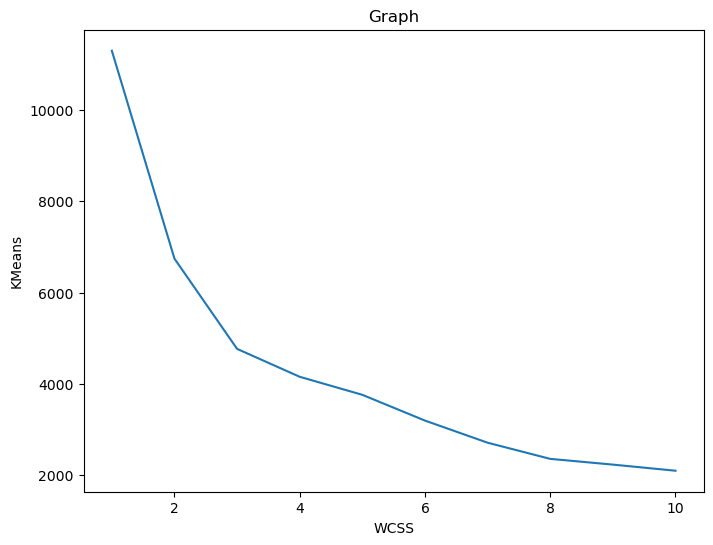

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(K_range,WCSS)
plt.title("Graph")
plt.xlabel("WCSS")
plt.ylabel("KMeans")
plt.xsticks(K_range)
plt.grid(True)
plt.show()